Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model **bold text**

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [3]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [4]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assume df is your original DataFrame
# Extract categorical columns (in this case, 'Department')
categorical_columns = ['Department']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical column
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical column
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")


Encoded Employee data : 
       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2             

In [6]:
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df=df_encoded
from sklearn.preprocessing import OrdinalEncoder

# Assuming df is your DataFrame
salary_column = ['salary']

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])

# Apply ordinal encoding to the salary column
df['salary_encoded'] = ordinal_encoder.fit_transform(df[salary_column])

# Display the resulting dataframe
print(f"Encoded Salary data : \n{df[['salary', 'salary_encoded']]}")


Encoded Salary data : 
       salary  salary_encoded
0         low             0.0
1      medium             1.0
2      medium             1.0
3         low             0.0
4         low             0.0
...       ...             ...
14994     low             0.0
14995     low             0.0
14996     low             0.0
14997     low             0.0
14998     low             0.0

[14999 rows x 2 columns]


In [8]:
df['salary_encoded'].unique()

array([0., 1., 2.])

In [9]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
df.drop('salary',axis=1,inplace=True)

In [11]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
#Plot bar charts showing impact of employee salaries on retention Plot bar charts showing corelation between department and
#employee retention Now build logistic regression model using variables that were narrowed down in
#step 1 Measure the accuracy of the model bold text
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


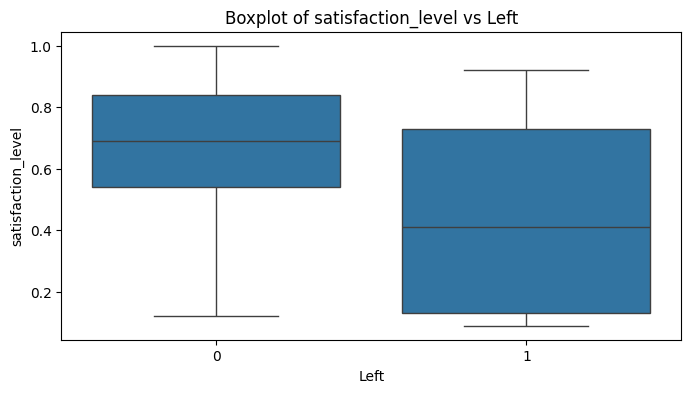

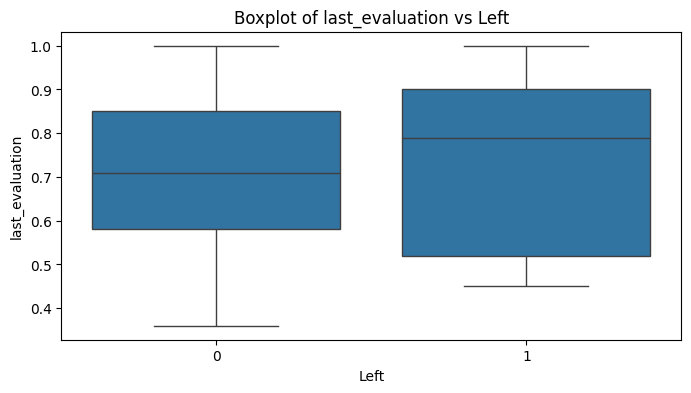

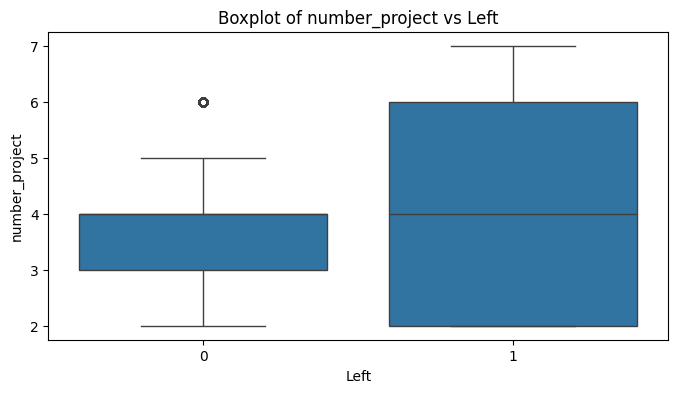

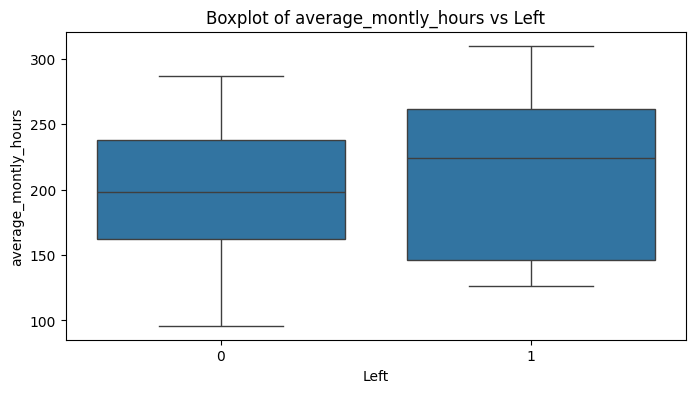

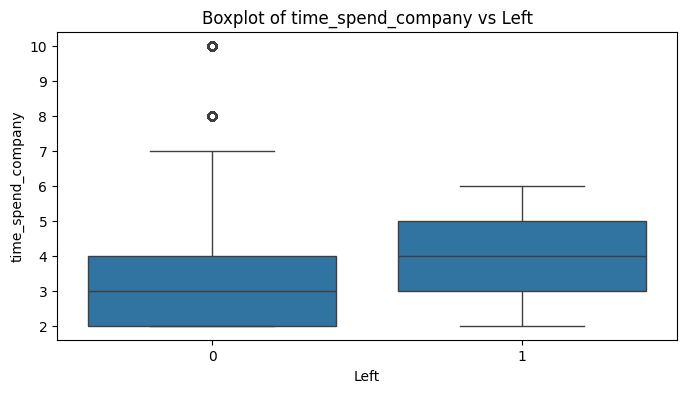

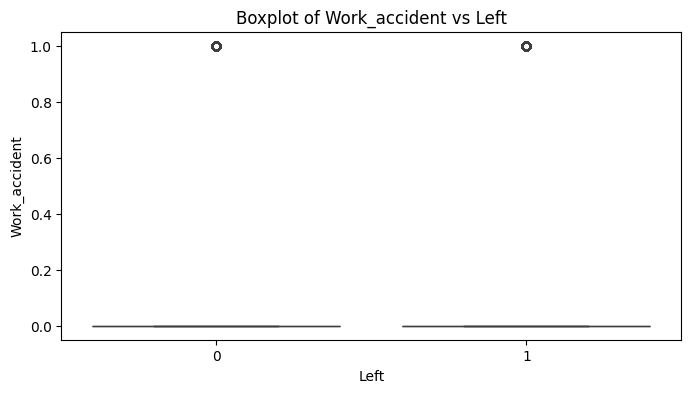

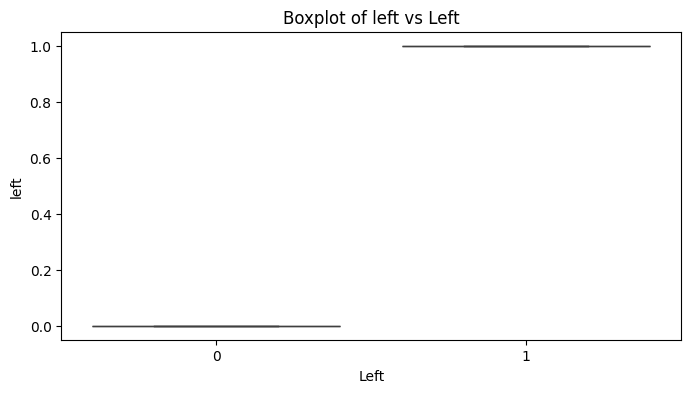

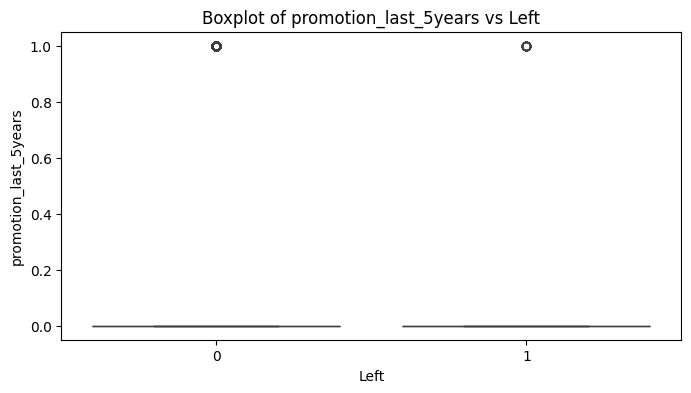

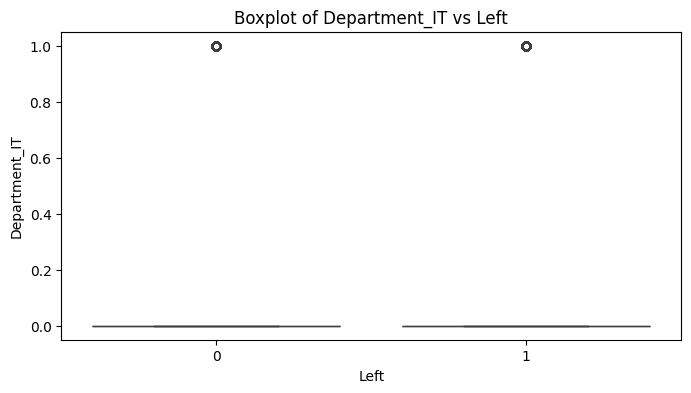

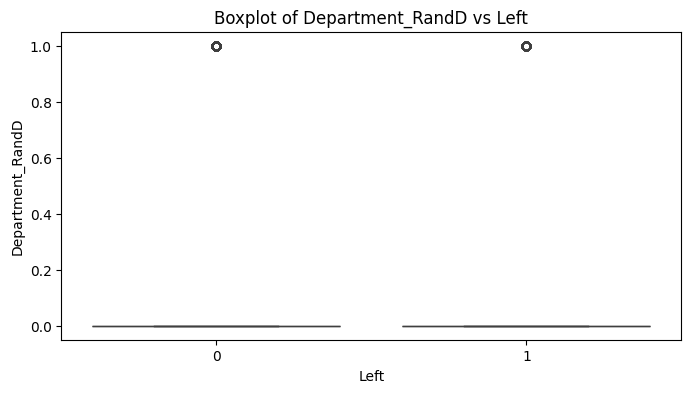

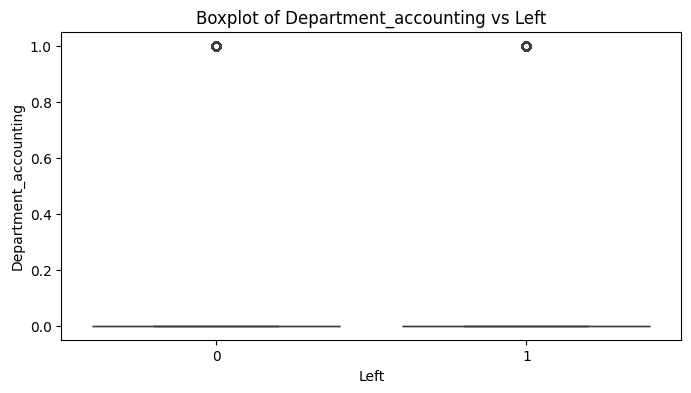

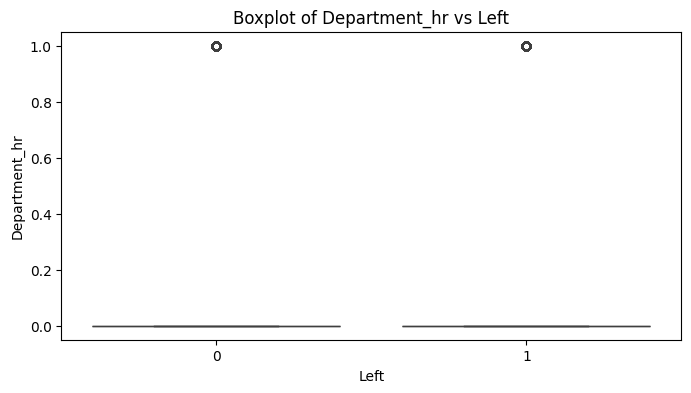

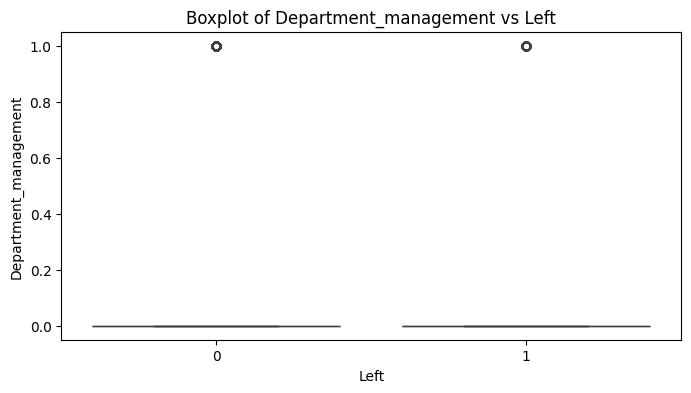

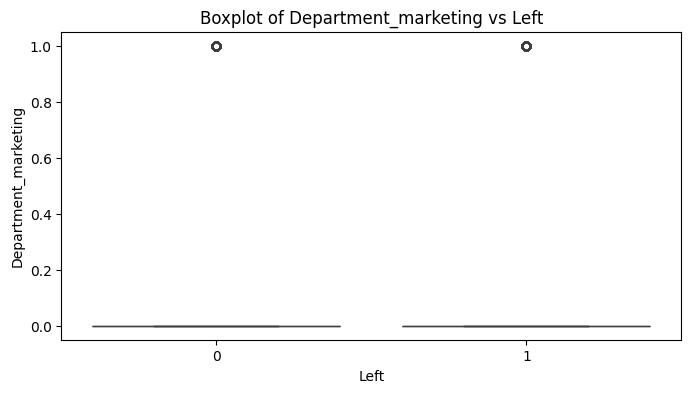

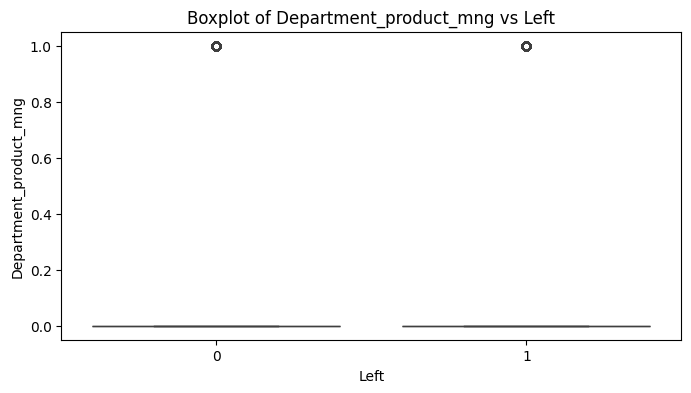

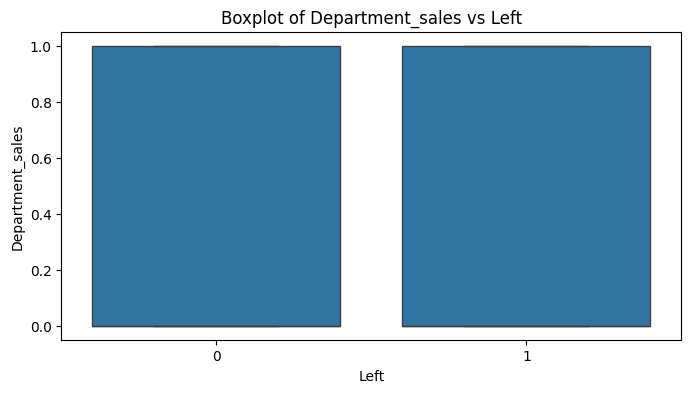

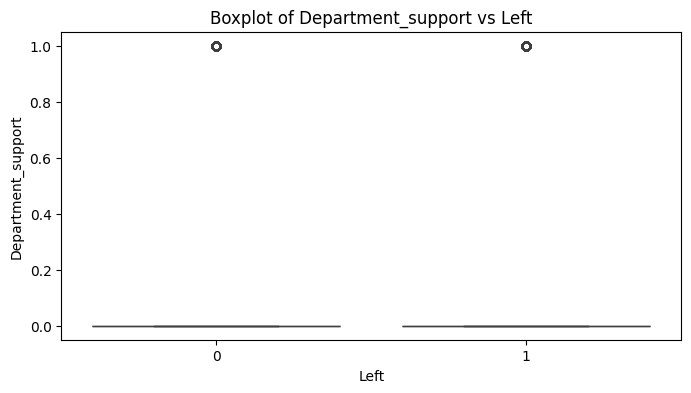

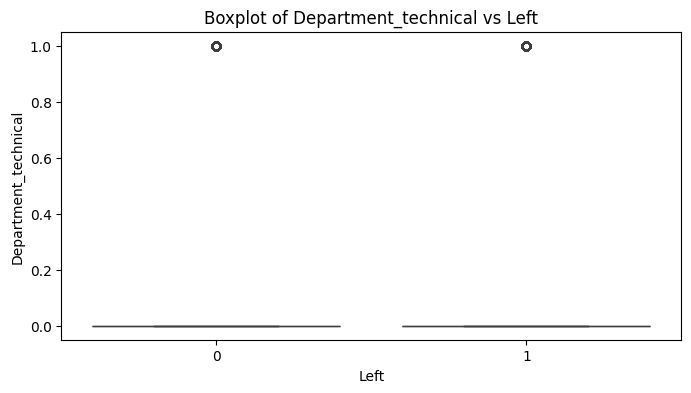

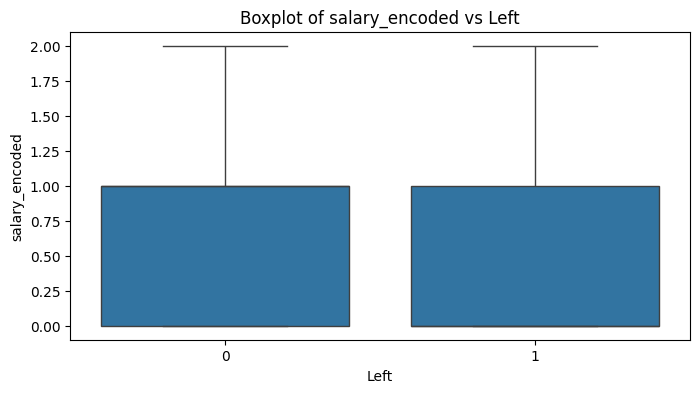

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'left' is the binary target variable
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='left', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs Left')
    plt.xlabel('Left')
    plt.ylabel(feature)
    plt.show()


In [15]:
df['salary_encoded'].unique()

array([0., 1., 2.])

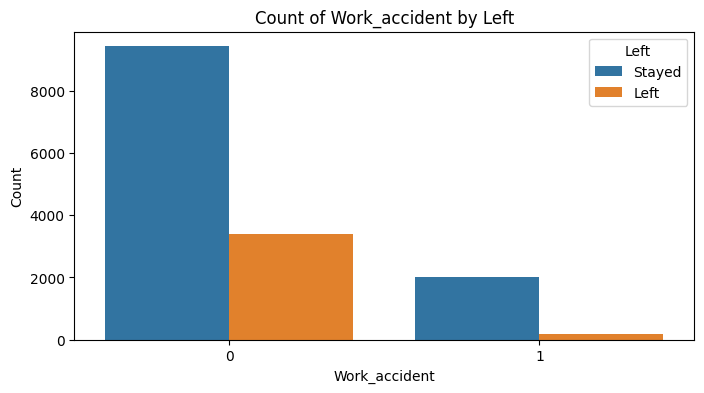

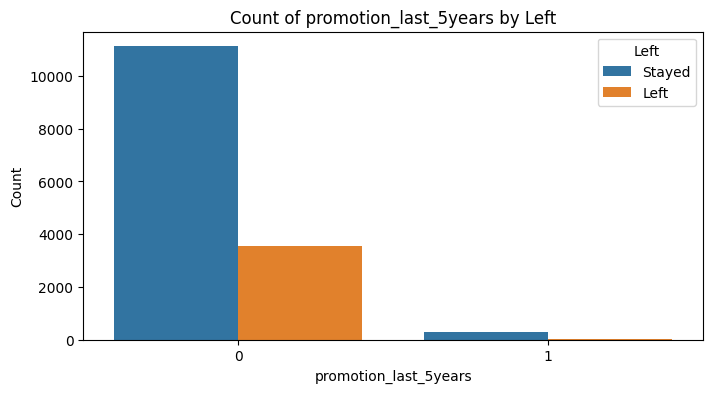

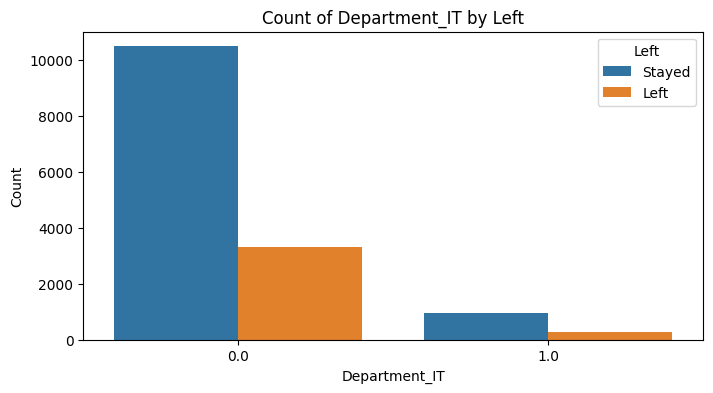

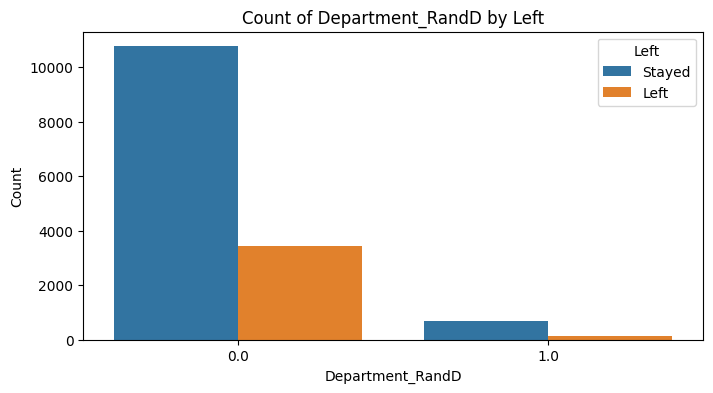

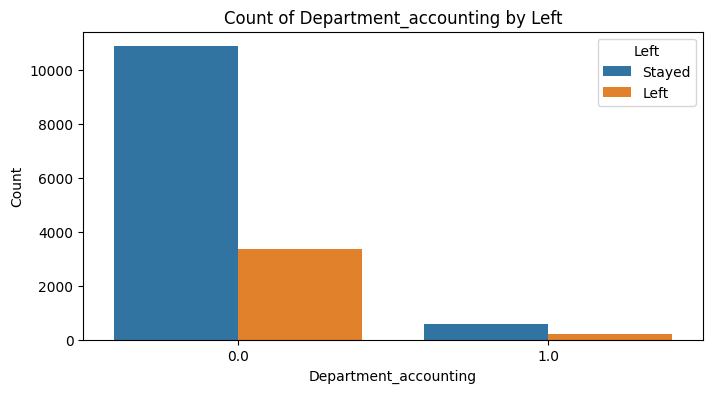

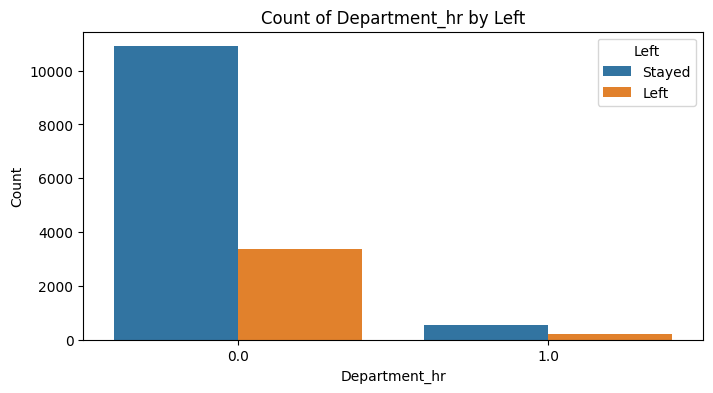

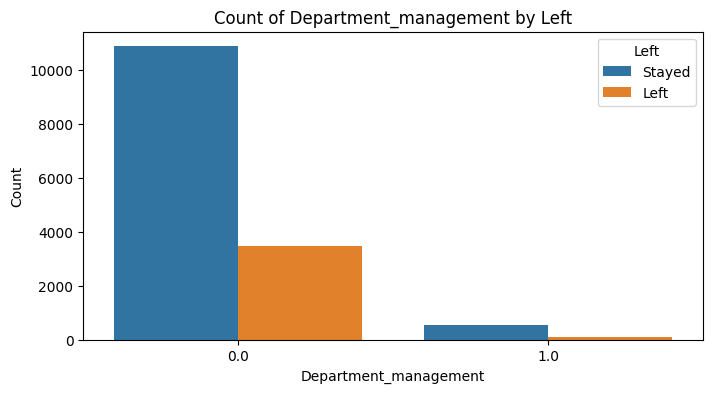

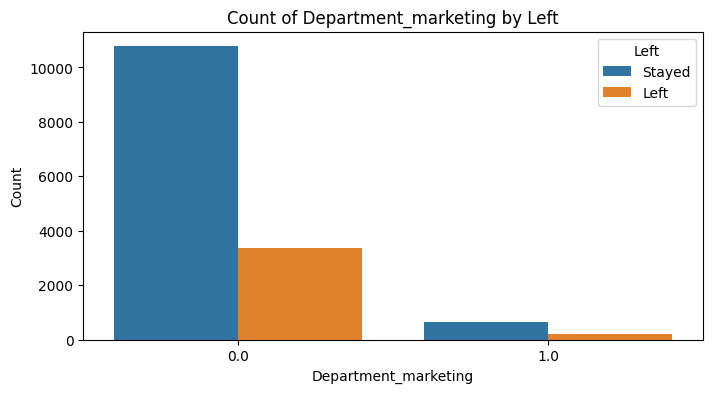

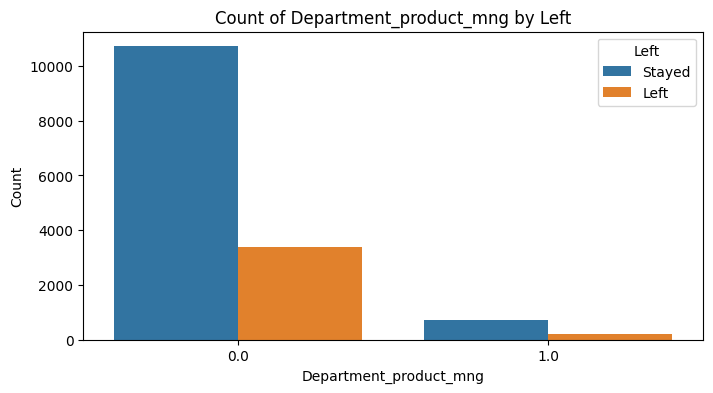

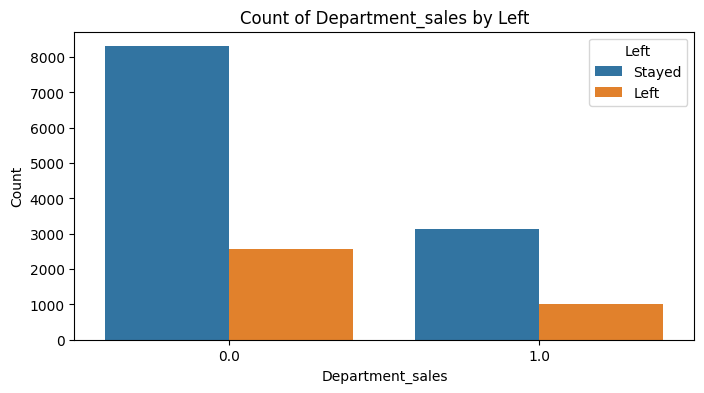

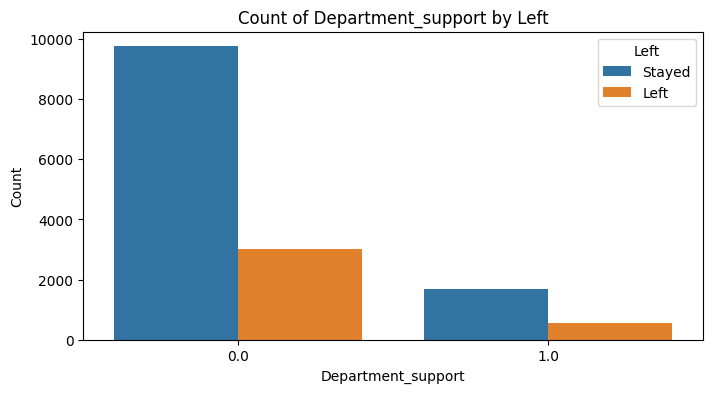

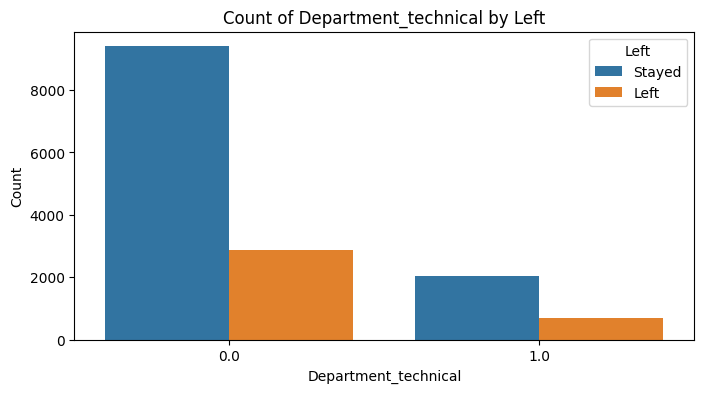

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of binary features
binary_features = [
    'Work_accident', 'promotion_last_5years',
    'Department_IT', 'Department_RandD', 'Department_accounting',
    'Department_hr', 'Department_management', 'Department_marketing',
    'Department_product_mng', 'Department_sales', 'Department_support',
    'Department_technical'
]

# Plot for each binary feature
for feature in binary_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='left', data=df)
    plt.title(f'Count of {feature} by Left')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
    plt.show()


In [17]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi2_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# List of binary/categorical features
categorical_features = [
    'Work_accident', 'promotion_last_5years',
    'Department_IT', 'Department_RandD', 'Department_accounting',
    'Department_hr', 'Department_management', 'Department_marketing',
    'Department_product_mng', 'Department_sales', 'Department_support',
    'Department_technical'
]

# Apply Chi-Square Test to all categorical features
p_values = {feature: chi2_test(df, feature, 'left') for feature in categorical_features}
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p-value'])
print(p_values_df)
#p>0.05 no effect

                   Feature       p-value
0            Work_accident  9.558240e-80
1    promotion_last_5years  6.344155e-14
2            Department_IT  1.925773e-01
3         Department_RandD  1.482313e-08
4    Department_accounting  6.903744e-02
5            Department_hr  6.370103e-04
6    Department_management  2.268252e-08
7     Department_marketing  9.489996e-01
8   Department_product_mng  1.900521e-01
9         Department_sales  2.325247e-01
10      Department_support  1.993172e-01
11    Department_technical  1.493916e-02


Key Takeaways:
Highly Significant Features:

Work_accident,
promotion_last_5years,
Department_RandD,
Department_management

Significant Features:

Department_hr

Department_technical


Not Significant Features:

Department_IT

Department_accounting

Department_marketing

Department_product_mng

Department_sales

Department_support

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_encoded'],
      dtype='object')


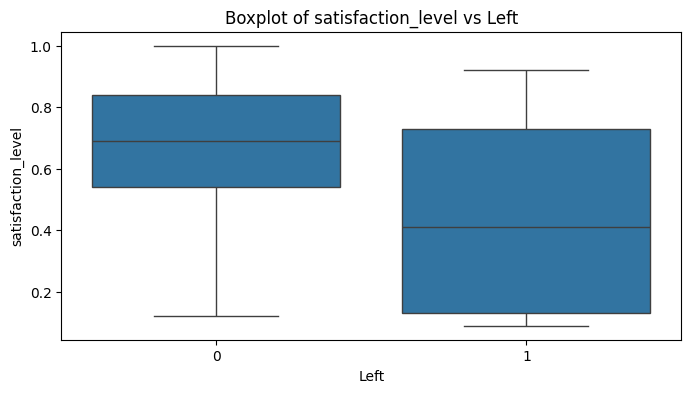

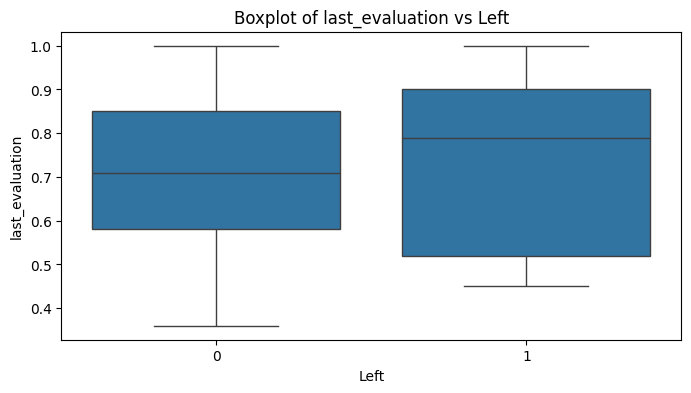

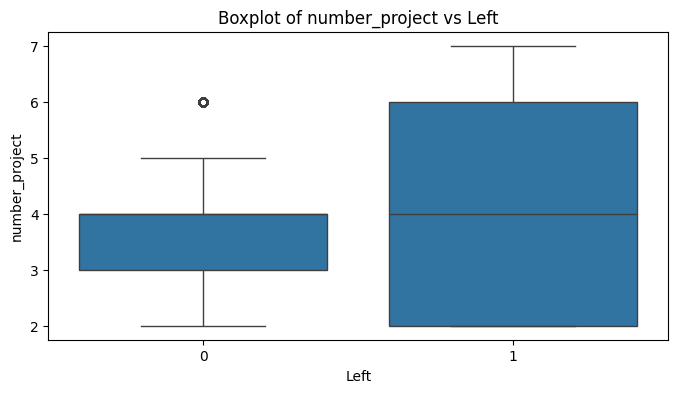

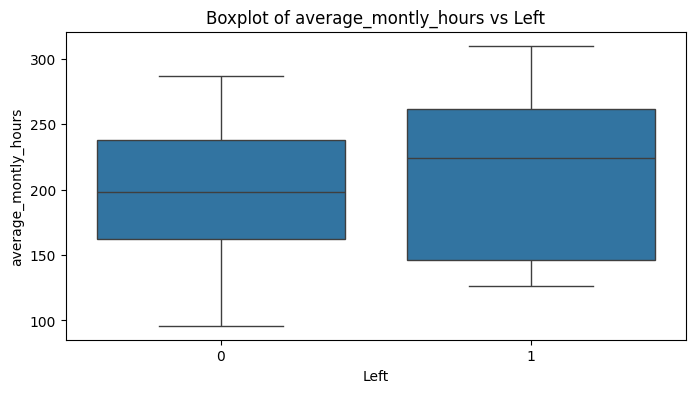

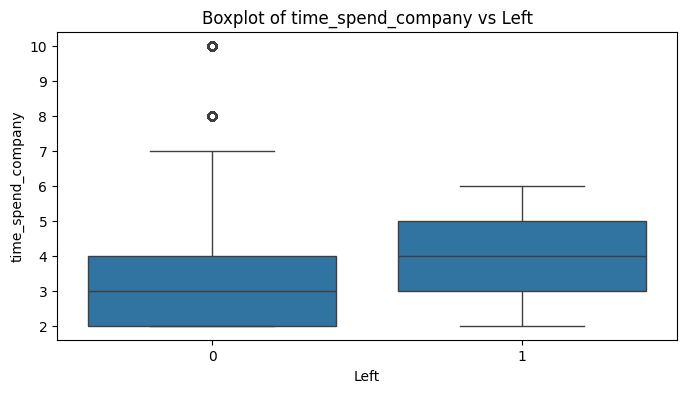

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to handle dataframes

# Assuming 'df' is a pandas DataFrame containing your data,
# verify it contains the necessary columns:
print(df.columns)

# List of numerical features
numerical_features = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company'
]

# Plot box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    # Check if the feature exists in the DataFrame before plotting
    if feature in df.columns:
        sns.boxplot(x='left', y=feature, data=df)
        plt.title(f'Boxplot of {feature} vs Left')
        plt.xlabel('Left')
        plt.ylabel(feature)
        plt.show()
    else:
        print(f"Column '{feature}' not found in the DataFrame.")

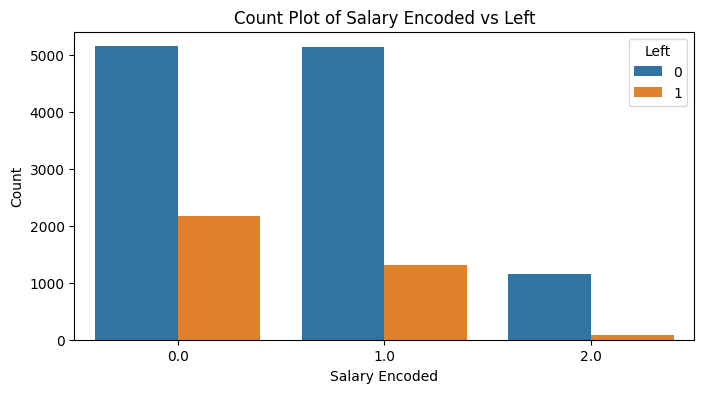

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for salary_encoded vs left
plt.figure(figsize=(8, 4))
sns.countplot(x='salary_encoded', hue='left', data=df)
plt.title('Count Plot of Salary Encoded vs Left')
plt.xlabel('Salary Encoded')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()


<ipython-input-25-f193c34d03fe>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Proportion', y='Department', data=department_proportions, palette='viridis')


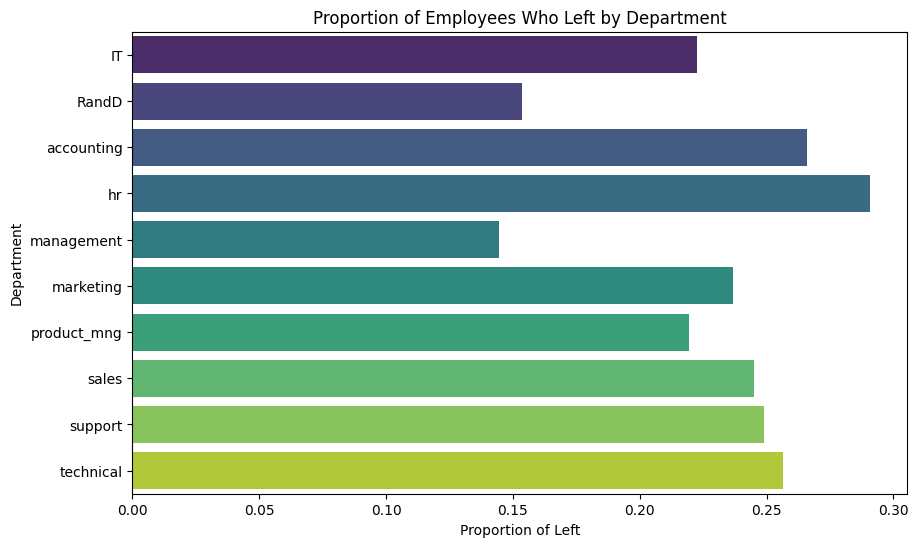

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of department columns
department_columns = [
    'Department_IT', 'Department_RandD', 'Department_accounting',
    'Department_hr', 'Department_management', 'Department_marketing',
    'Department_product_mng', 'Department_sales', 'Department_support',
    'Department_technical'
]

# Create a list to store department names and proportions
data = []

# Calculate the proportion of employees who left for each department
for dept in department_columns:
    proportion_left = df[df[dept] == 1]['left'].mean()
    data.append({'Department': dept.replace('Department_', ''), 'Proportion': proportion_left})

# Convert the list to a DataFrame
department_proportions = pd.DataFrame(data)

# Plot the proportions
plt.figure(figsize=(10, 6))
sns.barplot(x='Proportion', y='Department', data=department_proportions, palette='viridis')
plt.title('Proportion of Employees Who Left by Department')
plt.xlabel('Proportion of Left')
plt.ylabel('Department')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
X=df.drop('left',axis=1)
y=df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
model.score(X_test,y_test)

0.7866666666666666

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7866666666666666


In [40]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
clf.score(X_test,y_test)

0.989

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.989


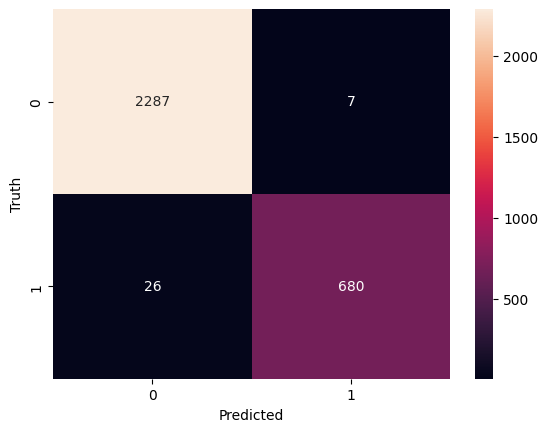

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()